In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
#======================================================[Preprocessing]----
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import preprocessing
#======================================================[MODELS]-----
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
#====================================================[Evaluation]
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/heart.csv")

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
hestPainType: chest pain type [TA: TypicalAngina , ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]good 200-240

FastingBS: to diagnose prediabetes, diabetes [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results اختبار غير جراحي يمكنه الكشف عن التشوهات بما في ذلك عدم انتظام ضربات القلب، والأدلة على مرض القلب التاجي، وتضخم البطين الأيسر، وكتل الفروع الحزيمية

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]60-100

ExerciseAngina: pain in the chest that comes on with exercise [Y: Yes, N: No]

Oldpeak:ST[Numeric value measured in depression]indicate health conditions such as hypokalemiaنقص بوتاسيوم, myocardial ischemiaنقص ترويه الدم

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df['FastingBS'].unique()

array([0, 1])

In [ ]:
def info_col(col):
    print(f"Column Name: {col.name}")
    print(f"Data Type: {col.dtype}")
    print(f"Number of Unique Values: {col.nunique()}")
    print(f"Null Values: {col.isnull().sum()}")

    if col.nunique() < 10:
       print(f"Unique Values: {col.unique()}")
       print(f"Value Counts:\n{col.value_counts()}\n")
    print("="*50,'\n')


In [ ]:
for col in df.columns:
    info_col(df[col])

Column Name: Age
Data Type: int64
Number of Unique Values: 50
Null Values: 0

Column Name: Sex
Data Type: object
Number of Unique Values: 2
Null Values: 0
Unique Values: ['M' 'F']
Value Counts:
Sex
M    725
F    193
Name: count, dtype: int64


Column Name: ChestPainType
Data Type: object
Number of Unique Values: 4
Null Values: 0
Unique Values: ['ATA' 'NAP' 'ASY' 'TA']
Value Counts:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


Column Name: RestingBP
Data Type: int64
Number of Unique Values: 67
Null Values: 0

Column Name: Cholesterol
Data Type: int64
Number of Unique Values: 222
Null Values: 0

Column Name: FastingBS
Data Type: int64
Number of Unique Values: 2
Null Values: 0
Unique Values: [0 1]
Value Counts:
FastingBS
0    704
1    214
Name: count, dtype: int64


Column Name: RestingECG
Data Type: object
Number of Unique Values: 3
Null Values: 0
Unique Values: ['Normal' 'ST' 'LVH']
Value Counts:
RestingECG
Normal    552
LVH       188
ST        1

In [ ]:
df.shape

(918, 12)

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
df.describe(include = 'O').T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [ ]:
zero_val=df.Cholesterol==0
zero_val.sum()

172

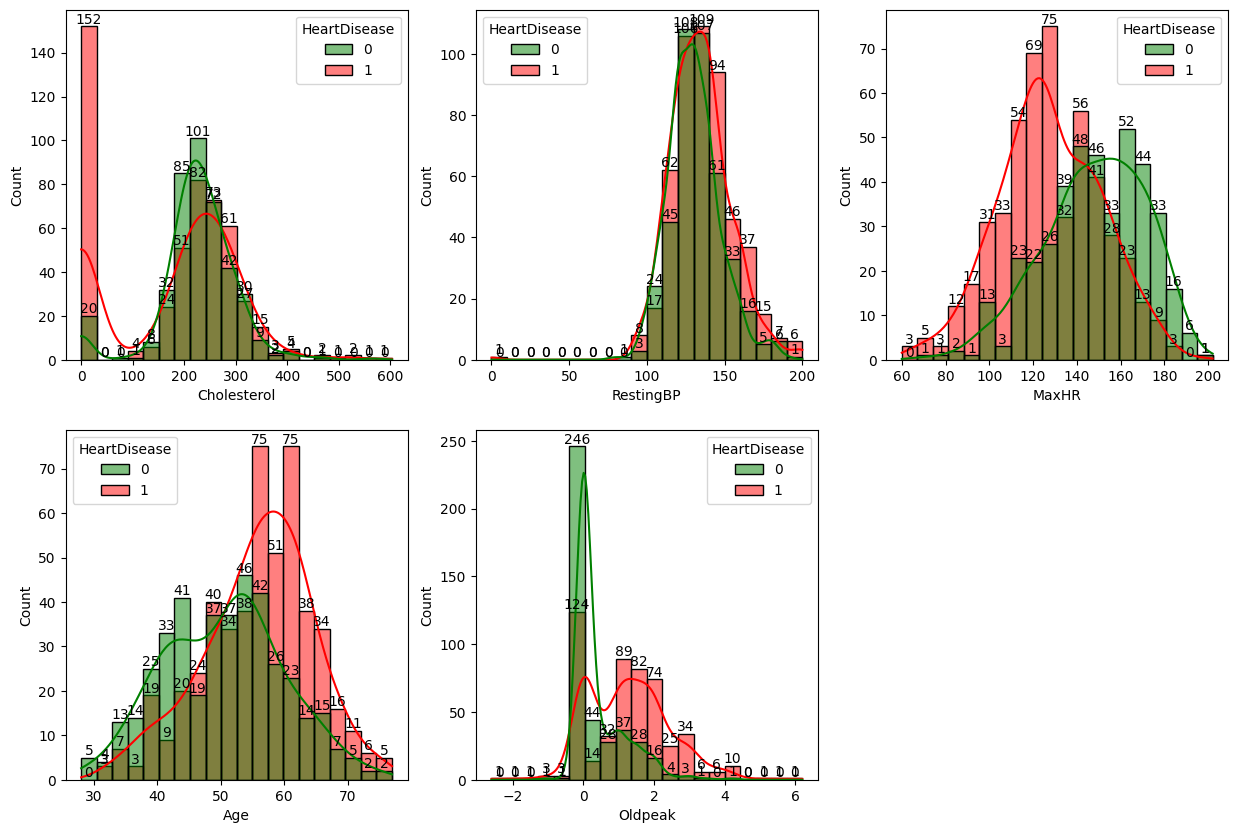

In [ ]:
num_coulmn=['Cholesterol','RestingBP','MaxHR','Age','Oldpeak']
plt.figure(figsize=(15,10))
for i,col in enumerate(num_coulmn):
     plt.subplot(2,3,i+1)
     hist=sns.histplot(data=df, x=col, hue='HeartDisease', kde=True,bins=20,alpha=0.5,palette=['green','red'])
     for patch in hist.patches:

      x = patch.get_x() + patch.get_width() / 2
      y = patch.get_height()

      hist.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=10, color='black')
plt.show()

In [ ]:
#your heart rate can increase from 50% to 90% of your maximum heart rate

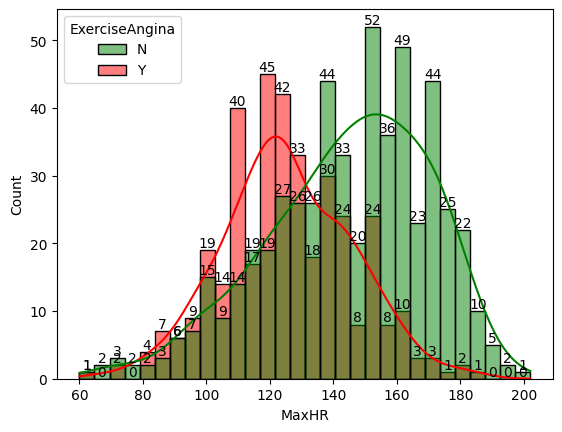

In [ ]:
hist=sns.histplot(data=df, x='MaxHR', hue='ExerciseAngina', kde=True,bins=30,alpha=0.5,palette=['green','red'])
for patch in hist.patches:

    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()

    hist.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=10, color='black')

In [ ]:
# to see the relation between the [HeartRate] and [ExerciseAngina]

In [ ]:
df['FastingBS']=df['FastingBS'].astype('object')
cat_features=df.select_dtypes(include='object').columns
cat_features

Index(['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
       'ST_Slope'],
      dtype='object')

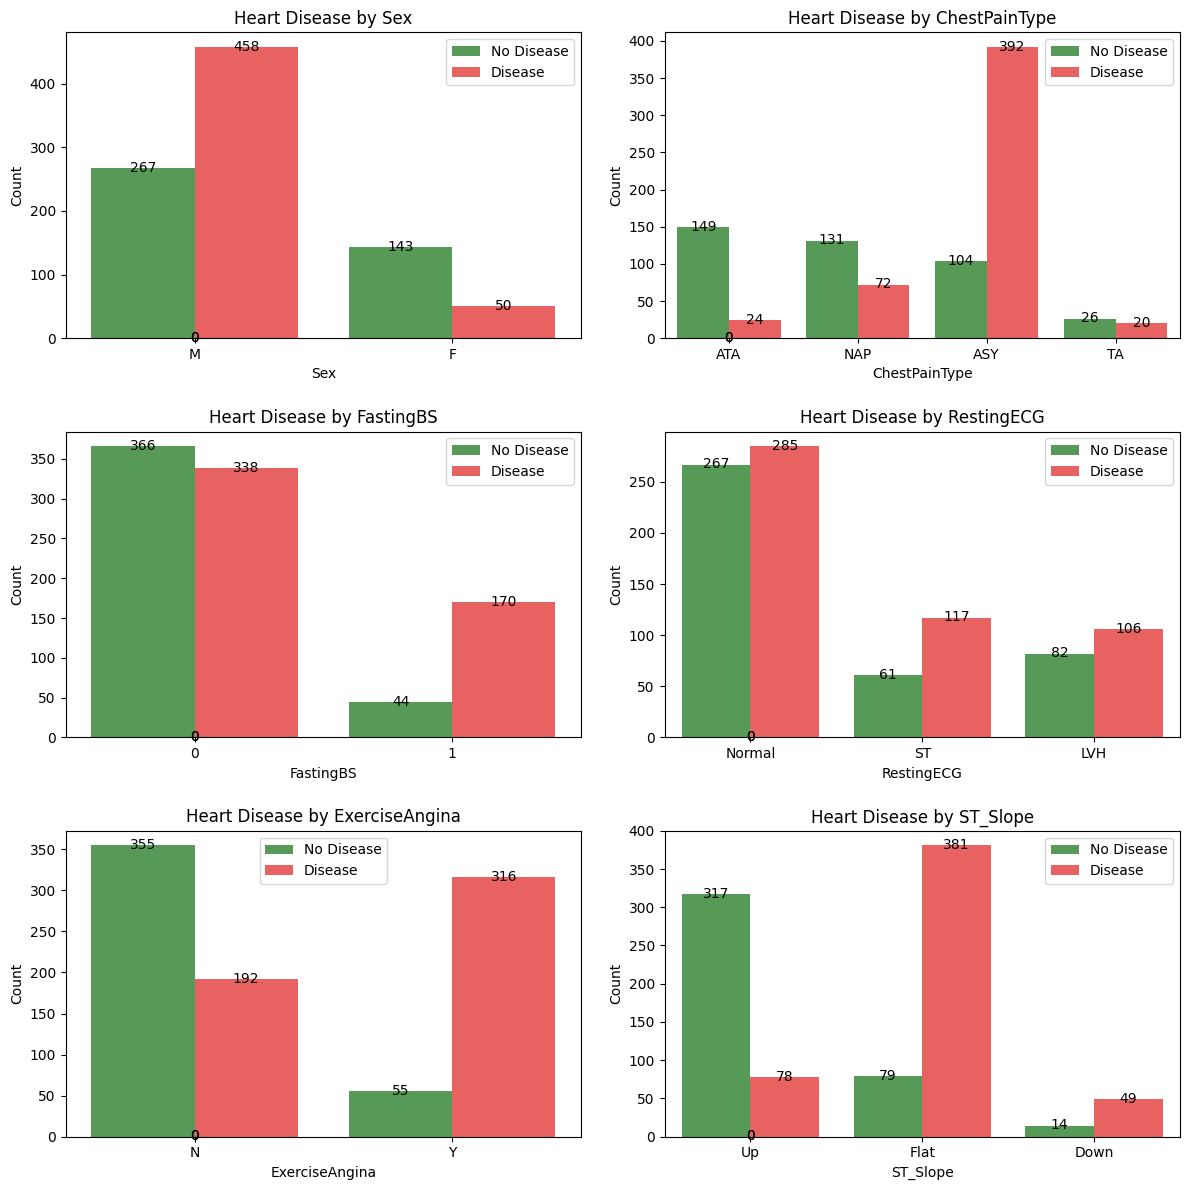

In [ ]:
plt.figure(figsize=(12,12))
for i,col in enumerate(cat_features):
    plt.subplot(3,2,i+1)
    sns.countplot(data = df ,x = col, hue = 'HeartDisease',palette=['green','red'],alpha=.7)

    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Heart Disease by {col}')
    plt.legend(['No Disease','Disease'])


plt.tight_layout(w_pad=2,h_pad=2)
plt.show()

In [ ]:
df['FastingBS']=df['FastingBS'].astype('int')

In [ ]:
cat_features=df.select_dtypes(include='object').columns
cat_features

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

### **textEncoding**

In [ ]:
for col in cat_features:
  if df[col].nunique() == 2:
    if col=='Sex':
      df[col]=df[col].map({'M':1,'F':0})
    else:
      df[col]=df[col].map({'N':0,'Y':1})
  else:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    pkl.dump(le,open(f'{col}_le.pkl','wb'))


df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


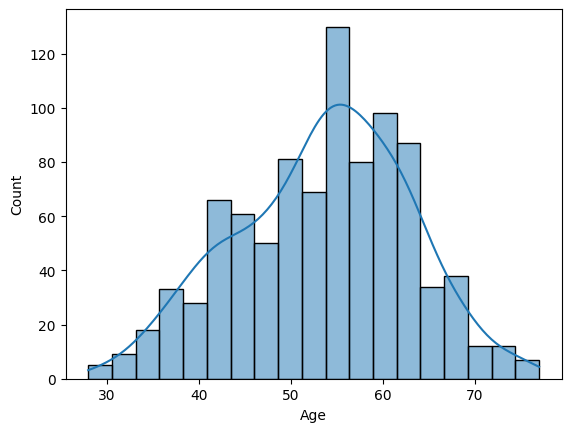

In [ ]:
sns.histplot(df['Age'],kde=True)
plt.show()

In [ ]:
df['Age']=pd.qcut(df['Age'], 10, labels=False)

In [ ]:
df['Age'].value_counts().sort_index()

,count
Age,
0,93
1,103
2,95
3,96
4,84
5,117
6,77
7,98
8,73


<Axes: >

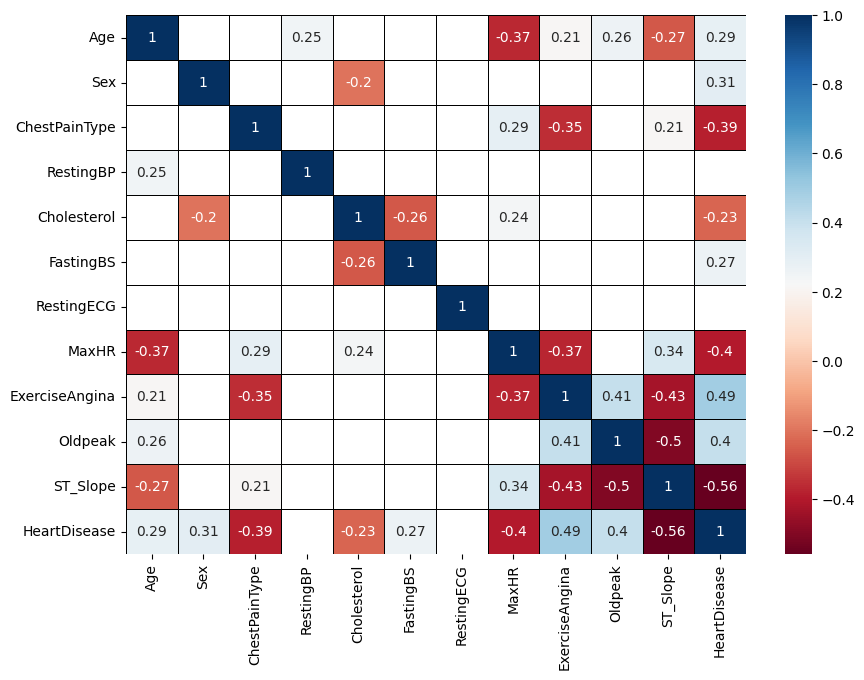

In [ ]:
correlation = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot= True, cmap = 'RdBu',linecolor='k',linewidths=.5, mask=correlation.abs()<0.2)

In [ ]:
df.Sex.value_counts()

,count
Sex,
1,725
0,193


In [ ]:
pd.DataFrame(df.groupby(['Sex','HeartDisease'])['HeartDisease'].count())

HeartDisease
Sex HeartDisease              
0   0                      143
    1                       50
1   0                      267
    1                      458

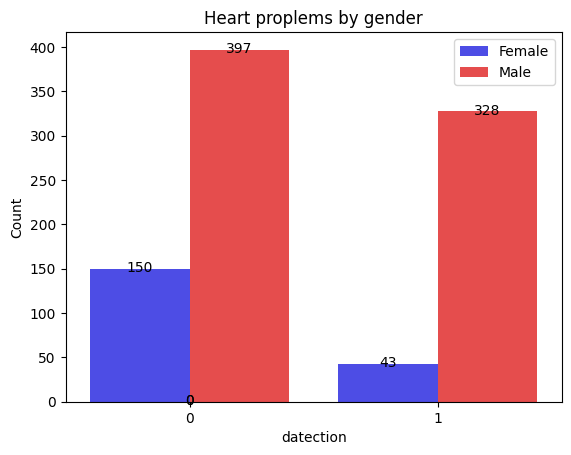

In [ ]:
sns.countplot(x='ExerciseAngina', data=df, palette=['blue','red'],hue='Sex',alpha=.8)

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

plt.xlabel('datection')
plt.ylabel('Count')
plt.title('Heart proplems by gender')
plt.legend(['Female','Male'])
plt.show()

### Check Unbalance

In [ ]:
df.HeartDisease.value_counts()

,count
HeartDisease,
1,508
0,410


## Treat Unbalance

In [ ]:
from collections import Counter
x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [ ]:
#from imblearn.under_sampling import TomekLinks
#random=TomekLinks()
#x_res,y_res=random.fit_resample(x,y)


### splitting

In [ ]:
# So you dont have to tomeklink because tha data is already small

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.30, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.25, random_state=42)

In [ ]:
x_train.shape, x_val.shape, x_test.shape

((481, 11), (161, 11), (276, 11))

In [ ]:
Accuracy_models=[]
recall_models=[]
Models_names=[]
f1_score_models=[]

#Evaluate Model & check overfitting

In [ ]:
def check_overfitting(model,x_train,x_val,x_test,y_train,y_val,y_test):
    y_train_pred=model.predict(x_train)
    y_val_pred=model.predict(x_val)
    y_test_pred=model.predict(x_test)

    Train_accuracy = accuracy_score(y_train,y_train_pred)
    Validaion_accuracy = accuracy_score(y_val,y_val_pred)
    Test_accuracy = accuracy_score(y_test,y_test_pred)

    test_recall_score=recall_score(y_test,y_test_pred)
    test_f1_score =f1_score(y_test,y_test_pred)
    precision_score_test=precision_score(y_test,y_test_pred)

    print(f"-Train accuracy: {Train_accuracy*100:.2f}%")
    print(f"-Validation accuracy: {Validaion_accuracy*100:.2f}%")
    print(f"-Test accuracy: {Test_accuracy*100:.2f}%\n")

    print(f'-Train Recall: {recall_score(y_train,y_train_pred)*100:.2f}%')
    print(f'-Validation Recall: {recall_score(y_val,y_val_pred)*100:.2f}%')
    print(f'-Test Recall: {test_recall_score*100:.2f}%\n')

    print(f'-Train F1_Score: {f1_score(y_train,y_train_pred)*100:.2f}%')
    print(f'-Validation F1_Score: {f1_score(y_val,y_val_pred)*100:.2f}%')
    print(f'-Test F1_Score: {test_f1_score*100:.2f}%\n')


    print(f'-Accuracy: {Test_accuracy*100:.2f}%')
    print(f'-Recall: { test_recall_score*100:.2f}%')
    print(f'-F1_Score: {test_f1_score*100:.2f}%')
    print(f'-Precision: {precision_score_test*100:.2f}%\n\n')

    sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='d')
    plt.show()

    if abs(Validaion_accuracy - Train_accuracy)*100 > 5:
        print(f"-Overfitting with diff: {abs(Validaion_accuracy - Train_accuracy)*100:.2f}%\n")
        print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n')
    else:
        print(f"-Not Overfitting & Recall-score: {test_recall_score*100:.2f}%\n\n")

    recall_models.append(test_recall_score)
    Accuracy_models.append(Test_accuracy)
    f1_score_models.append(test_f1_score)

#[1]- Decision Tree

In [ ]:
decision_tree=DecisionTreeClassifier(random_state=42)
params={'criterion':['gini','entropy'], 'max_depth':[4,5,8,10],'ccp_alpha':[.01,.02,.03]}
grid=GridSearchCV(estimator=decision_tree,
                  param_grid=params,
                  cv=5,
                  scoring='recall')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.01, 0.02, 0.03],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 8, 10]},
             scoring='recall')

In [ ]:
final_decision_tree=grid.best_estimator_
grid.best_params_

{'ccp_alpha': 0.02, 'criterion': 'entropy', 'max_depth': 4}

-Train accuracy: 81.08%
-Validation accuracy: 84.47%
-Test accuracy: 80.07%

-Train Recall: 86.51%
-Validation Recall: 86.96%
-Test Recall: 80.49%

-Train F1_Score: 82.73%
-Validation F1_Score: 86.49%
-Test F1_Score: 82.76%

-Accuracy: 80.07%
-Recall: 80.49%
-F1_Score: 82.76%
-Precision: 85.16%




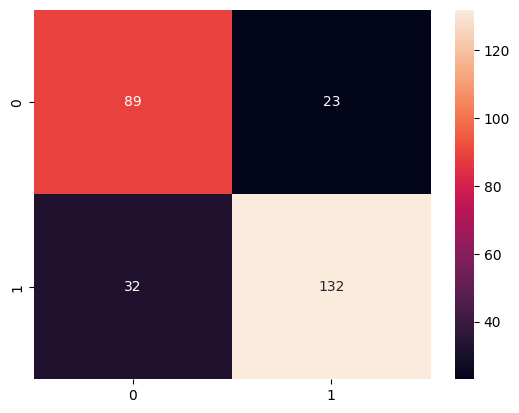

-Not Overfitting & Recall-score: 80.49%




In [ ]:
check_overfitting(final_decision_tree,x_train,x_val,x_test,y_train,y_val,y_test)

In [ ]:
Models_names.append('Decision Tree')

**Scaling**

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)
x_test=scaler.transform(x_test)

pkl.dump(scaler,open('scaler.pkl','wb'))

# Preferably after Decision Tree
# because scaling decrease the performance of Decision Tree

#[2]-Logistic Regression

In [ ]:
lr=LogisticRegression()
params={'multi_class':['ovr','auto'],'C':[0.1,1,10,100],'penalty':['l1','l2']}
grid=GridSearchCV(estimator=lr,
                  param_grid=params,
                  cv=5,
                  scoring='recall')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'multi_class': ['ovr', 'auto'],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [ ]:
finall_lr=grid.best_estimator_
grid.best_params_

{'C': 1, 'multi_class': 'ovr', 'penalty': 'l2'}

-Train accuracy: 84.82%
-Validation accuracy: 85.09%
-Test accuracy: 86.23%

-Train Recall: 87.70%
-Validation Recall: 83.70%
-Test Recall: 84.15%

-Train F1_Score: 85.83%
-Validation F1_Score: 86.52%
-Test F1_Score: 87.90%

-Accuracy: 86.23%
-Recall: 84.15%
-F1_Score: 87.90%
-Precision: 92.00%




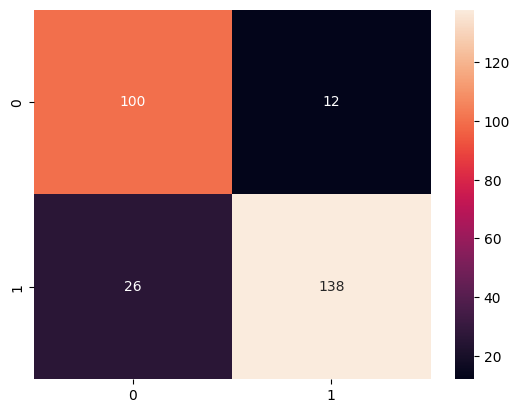

-Not Overfitting & Recall-score: 84.15%




In [ ]:
check_overfitting(finall_lr,x_train,x_val,x_test,y_train,y_val,y_test)

In [ ]:
Models_names.append('Logistic Regression')

#[3]-SVC

In [ ]:
svc = SVC()

skf = StratifiedKFold(n_splits=5)

recall_scores = cross_val_score(estimator=svc,
                                X=x_train,
                                y=y_train,
                                cv=skf,
                                scoring='recall')  # Use recall as the scoring metric

recall_scores

array([0.94117647, 0.84313725, 0.92      , 0.92      , 0.84      ])

In [ ]:
svc.fit(x_train,y_train)

SVC()

-Train accuracy: 88.36%
-Validation accuracy: 84.47%
-Test accuracy: 89.13%

-Train Recall: 92.86%
-Validation Recall: 85.87%
-Test Recall: 90.24%

-Train F1_Score: 89.31%
-Validation F1_Score: 86.34%
-Test F1_Score: 90.80%

-Accuracy: 89.13%
-Recall: 90.24%
-F1_Score: 90.80%
-Precision: 91.36%




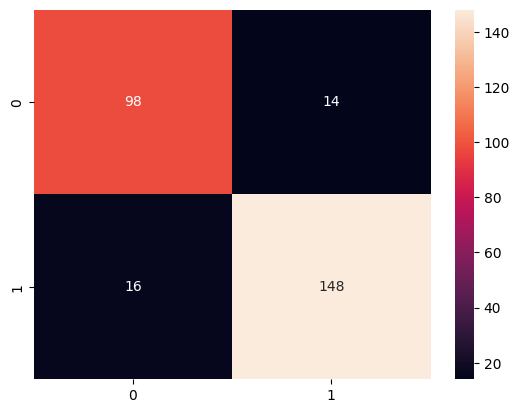

-Not Overfitting & Recall-score: 90.24%




In [ ]:
check_overfitting(svc,x_train,x_val,x_test,y_train,y_val,y_test)

In [ ]:
Models_names.append('SVC')

#[4]-KNN

In [ ]:
knn=KNeighborsClassifier()

params={'n_neighbors':[1,3,5,7,8,9,11,13,15,17],
        'weights':['uniform','distance'],
        'algorithm':['auto','ball_tree','kd_tree','brute'],
        'p':[1,2],
        }
grid=GridSearchCV(estimator=knn,
                  param_grid=params,
                  cv=5,
                  scoring='recall')
grid.fit(x_train,y_train)

grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

In [ ]:
KNN_Modle=grid.best_estimator_

-Train accuracy: 100.00%
-Validation accuracy: 85.71%
-Test accuracy: 87.68%

-Train Recall: 100.00%
-Validation Recall: 85.87%
-Test Recall: 85.98%

-Train F1_Score: 100.00%
-Validation F1_Score: 87.29%
-Test F1_Score: 89.24%

-Accuracy: 87.68%
-Recall: 85.98%
-F1_Score: 89.24%
-Precision: 92.76%




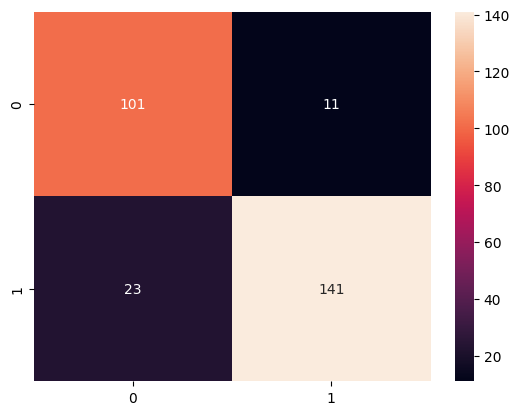

-Overfitting with diff: 14.29%

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx



In [ ]:
check_overfitting(KNN_Modle,x_train,x_val,x_test,y_train,y_val,y_test)

In [ ]:
Models_names.append('KNN')

#[5]-Gaussian NB

In [ ]:
GNB=GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid=GridSearchCV(estimator=GNB,
                  param_grid=param_grid,
                  cv=5,
                  scoring='recall')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='recall')

In [ ]:
Nave_Modle=grid.best_estimator_
grid.best_params_

{'var_smoothing': 1e-09}

-Train accuracy: 84.62%
-Validation accuracy: 82.61%
-Test accuracy: 88.41%

-Train Recall: 85.71%
-Validation Recall: 79.35%
-Test Recall: 87.20%

-Train F1_Score: 85.38%
-Validation F1_Score: 83.91%
-Test F1_Score: 89.94%

-Accuracy: 88.41%
-Recall: 87.20%
-F1_Score: 89.94%
-Precision: 92.86%




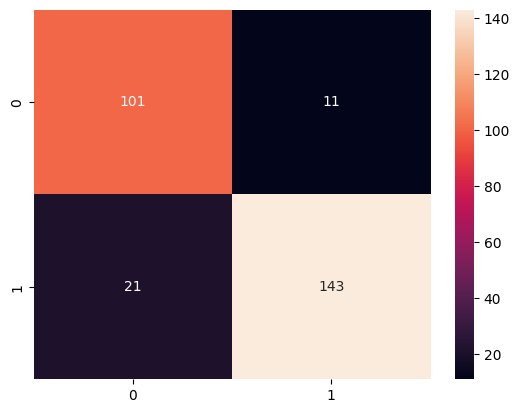

-Not Overfitting & Recall-score: 87.20%




In [ ]:
check_overfitting(Nave_Modle,x_train,x_val,x_test,y_train,y_val,y_test)

In [ ]:
Models_names.append('Nave_Modle')

#[6]-Random forest

In [ ]:
RF=RandomForestClassifier(random_state=42)

param= {
    'n_estimators': [10,50,100,150,200],           # Number of trees
    'max_depth': [1,2,3,4,5,6,7,8,9,10,20,30],           # Maximum depth of trees
    'min_samples_split': [2, 5, 10],           # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum samples to be at a leaf node

}
grid=GridSearchCV(estimator=RF,
                  param_grid=param,
                  cv=5,
                  scoring='recall',
                  )

grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 150, 200]},
             scoring='recall')

In [147]:
Random_F_Model=grid.best_estimator_
grid.best_params_

{'max_depth': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

-Train accuracy: 90.02%
-Validation accuracy: 85.71%
-Test accuracy: 88.04%

-Train Recall: 93.65%
-Validation Recall: 86.96%
-Test Recall: 88.41%

-Train F1_Score: 90.77%
-Validation F1_Score: 87.43%
-Test F1_Score: 89.78%

-Accuracy: 88.04%
-Recall: 88.41%
-F1_Score: 89.78%
-Precision: 91.19%




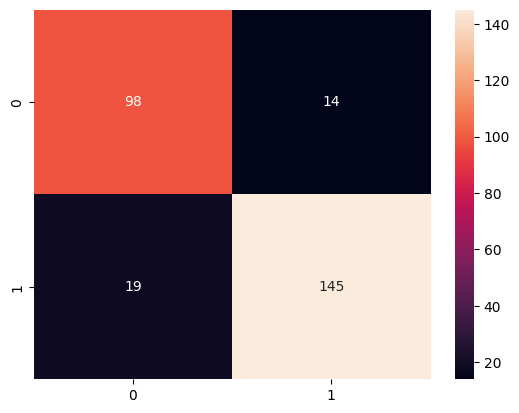

-Not Overfitting & Recall-score: 88.41%




In [148]:
check_overfitting(Random_F_Model,x_train,x_val,x_test,y_train,y_val,y_test)

In [149]:
Models_names.append('Random forest')

#[7]-Gradient_boosting

In [150]:
gradient_boosting=GradientBoostingClassifier(n_estimators=200,
                                            learning_rate=0.001,
                                            max_depth=4,
                                            random_state=42)
gradient_boosting.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.001, max_depth=4, n_estimators=200,
                           random_state=42)

-Train accuracy: 88.15%
-Validation accuracy: 82.61%
-Test accuracy: 82.97%

-Train Recall: 96.43%
-Validation Recall: 88.04%
-Test Recall: 86.59%

-Train F1_Score: 89.50%
-Validation F1_Score: 85.26%
-Test F1_Score: 85.80%

-Accuracy: 82.97%
-Recall: 86.59%
-F1_Score: 85.80%
-Precision: 85.03%




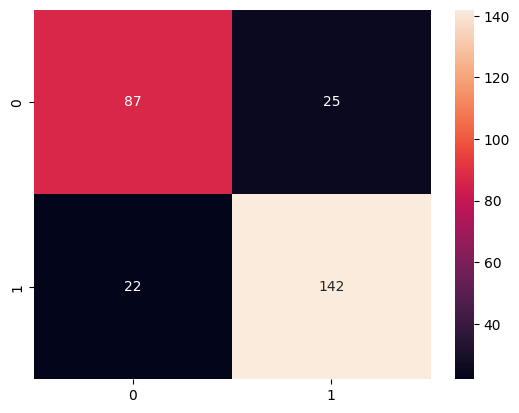

-Overfitting with diff: 5.54%

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx



In [151]:
check_overfitting(gradient_boosting,x_train,x_val,x_test,y_train,y_val,y_test)

In [152]:
Models_names.append('Gradient_boosting')

#[8]-xgboost

In [153]:
xgboost=XGBClassifier(n_estimators=100, max_depth=2, learning_rate=0.01, random_state=42)
xgboost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

-Train accuracy: 82.95%
-Validation accuracy: 84.47%
-Test accuracy: 81.52%

-Train Recall: 88.49%
-Validation Recall: 86.96%
-Test Recall: 80.49%

-Train F1_Score: 84.47%
-Validation F1_Score: 86.49%
-Test F1_Score: 83.81%

-Accuracy: 81.52%
-Recall: 80.49%
-F1_Score: 83.81%
-Precision: 87.42%




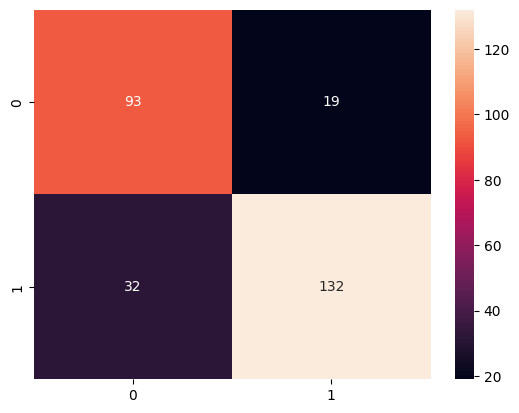

-Not Overfitting & Recall-score: 80.49%




In [154]:
check_overfitting(xgboost,x_train,x_val,x_test,y_train,y_val,y_test)

In [155]:
Models_names.append('xgboost')

#[9]-AdaBoost

In [156]:
adaboost=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                            n_estimators=100,
                            learning_rate=0.01,
                            random_state=42)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=100, random_state=42)

-Train accuracy: 81.08%
-Validation accuracy: 84.47%
-Test accuracy: 80.07%

-Train Recall: 86.51%
-Validation Recall: 86.96%
-Test Recall: 80.49%

-Train F1_Score: 82.73%
-Validation F1_Score: 86.49%
-Test F1_Score: 82.76%

-Accuracy: 80.07%
-Recall: 80.49%
-F1_Score: 82.76%
-Precision: 85.16%




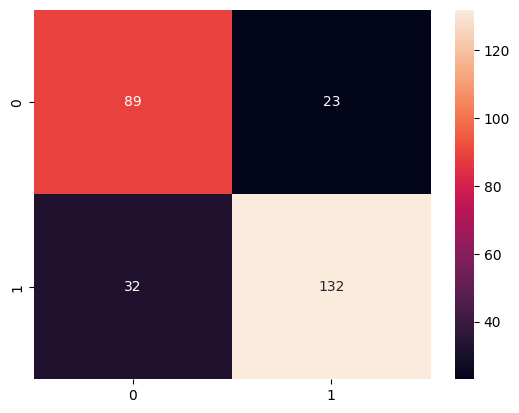

-Not Overfitting & Recall-score: 80.49%




In [157]:
check_overfitting(adaboost,x_train,x_val,x_test,y_train,y_val,y_test)

In [158]:
Models_names.append('AdaBoost')

#[10]-Stacking

In [159]:
from re import X
base_models = [('rf',RandomForestClassifier(max_depth= 4, n_estimators= 40)),
               ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.01, max_depth=4, random_state=42))]

meta_model = XGBClassifier(n_estimators=100, max_depth=2, learning_rate=0.01, random_state=42)
stacking = StackingClassifier(estimators=base_models,
                              final_estimator=meta_model
                              )
stacking.fit(x_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=4,
                                                       n_estimators=40)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.01,
                                                           max_depth=4,
                                                           n_estimators=200,
                                                           random_state=42))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 device=None,
                                                 early_s...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.01,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=2, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=42, ...))

-Train accuracy: 87.11%
-Validation accuracy: 87.58%
-Test accuracy: 87.68%

-Train Recall: 94.44%
-Validation Recall: 94.57%
-Test Recall: 91.46%

-Train F1_Score: 88.48%
-Validation F1_Score: 89.69%
-Test F1_Score: 89.82%

-Accuracy: 87.68%
-Recall: 91.46%
-F1_Score: 89.82%
-Precision: 88.24%




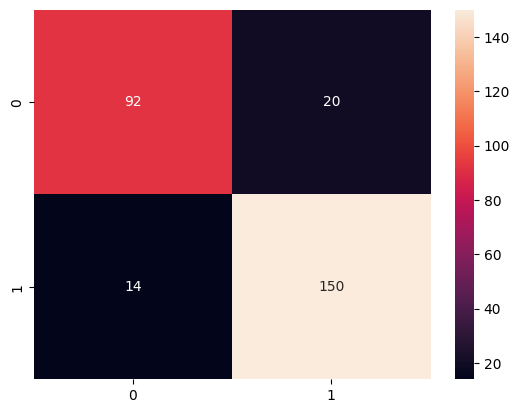

-Not Overfitting & Recall-score: 91.46%




In [160]:
check_overfitting(stacking,x_train,x_val,x_test,y_train,y_val,y_test)

In [161]:
Models_names.append('Stacking')

#**Accuracy Compare**

In [162]:
model_accuracy=pd.DataFrame({'Model':Models_names[:10],'Accuracy':Accuracy_models[:10],'Recall':recall_models[:10],'F1_Score':f1_score_models[:10]}).sort_values(by='Recall',ascending=False)
model_accuracy

,Model,Accuracy,Recall,F1_Score
9,Stacking,0.876812,0.914634,0.898204
2,SVC,0.891304,0.902439,0.907975
5,Random forest,0.880435,0.884146,0.897833
4,Nave_Modle,0.884058,0.871951,0.899371
6,Gradient_boosting,0.829710,0.865854,0.858006
3,KNN,0.876812,0.859756,0.892405
1,Logistic Regression,0.862319,0.841463,0.878981
0,Decision Tree,0.800725,0.804878,0.827586
7,xgboost,0.815217,0.804878,0.838095
8,AdaBoost,0.800725,0.804878,0.827586


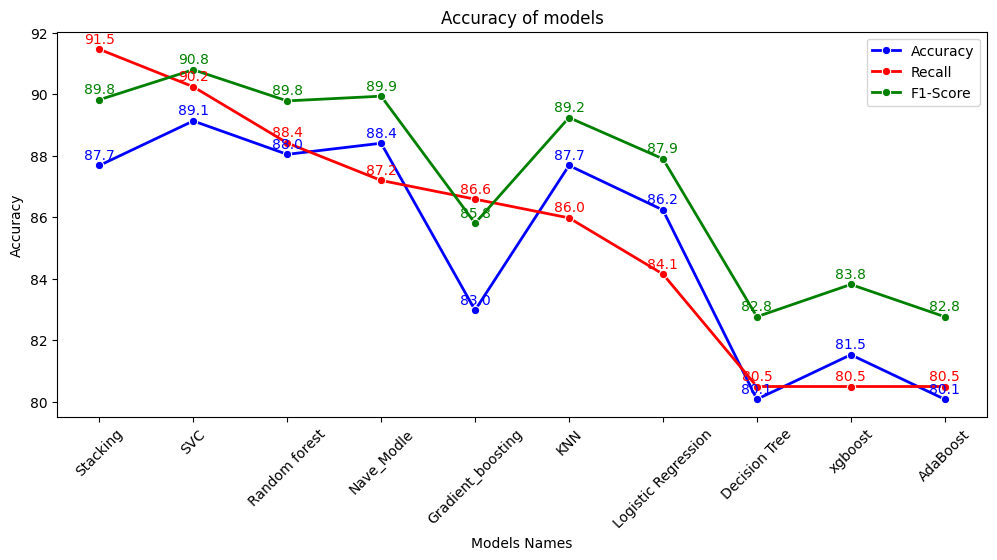

In [163]:
plt.figure(figsize=(12,5))
#sns.lineplot(x=model_accuracy['Model'],y=model_accuracy['Accuracy']*100,marker='o',color='b',lw=2,label='Accuracy')
#sns.lineplot(x=model_accuracy['Model'],y=model_accuracy['Recall']*100,marker='o',color='r',lw=2,label='Recall')
#sns.lineplot(x=model_accuracy['Model'],y=model_accuracy['F1_Score']*100,marker='o',color='g',lw=2,label='F1-Score')
sns.lineplot(x=model_accuracy['Model'],y=model_accuracy['Accuracy']*100,marker='o',color='b',lw=2,label='Accuracy')
for i, score in enumerate(model_accuracy['Accuracy']):
    plt.text(i, score*100 + 0.2, f'{score*100:.1f}', ha='center', color='b')

sns.lineplot(x=model_accuracy['Model'],y=model_accuracy['Recall']*100,marker='o',color='r',lw=2,label='Recall')
for i, score in enumerate(model_accuracy['Recall']):
    plt.text(i, score*100 + 0.2, f'{score*100:.1f}', ha='center', color='r')

sns.lineplot(x=model_accuracy['Model'],y=model_accuracy['F1_Score']*100,marker='o',color='g',lw=2,label='F1-Score')
for i, score in enumerate(model_accuracy['F1_Score']):
    plt.text(i, score*100 + 0.2, f'{score*100:.1f}', ha='center', color='g')
#---------------------------------------------------------------

plt.legend()
plt.xticks(rotation=45)

plt.xlabel('Models Names')
plt.ylabel('Accuracy')
plt.title('Accuracy of models')
plt.show()

In [164]:
best_accuracy=model_accuracy.sort_values(by='Accuracy',ascending=False).reset_index(drop=True)
best_recall=model_accuracy.sort_values(by='Recall',ascending=False).reset_index(drop=True)
best_f1_score=model_accuracy.sort_values(by='F1_Score',ascending=False).reset_index(drop=True)

In [165]:
print(f'Best Accuracy Model: {best_accuracy.Model[0]} With accuracy: {best_accuracy.Accuracy[0]*100:0.2f}%')
print(f'Best Recall Model: {best_recall.Model[0]} With Recall: {best_recall.Recall[0]*100:0.2f}%')
print(f'Best F1_Score Model: {best_f1_score.Model[0]} With F1_Score: {best_f1_score.F1_Score[0]*100:0.2f}%')

Best Accuracy Model: SVC With accuracy: 89.13%
Best Recall Model: Stacking With Recall: 91.46%
Best F1_Score Model: SVC With F1_Score: 90.80%


In [166]:
models=[final_decision_tree, finall_lr, svc, KNN_Modle, Nave_Modle, Random_F_Model, gradient_boosting, xgboost, adaboost, stacking]
names=['Decision_Tree', 'Logistic_Regression','SVC', 'KNN', 'Naive_bayes', 'Random_forest', 'Gradient_boosting', 'xgboost', 'AdaBoost', 'Stacking']
for model,name in zip(models,names):
    pkl.dump(model,open(f'{name}.pkl','wb'))

In [167]:
Models_names

['Decision Tree',
 'Logistic Regression',
 'SVC',
 'KNN',
 'Nave_Modle',
 'Random forest',
 'Gradient_boosting',
 'xgboost',
 'AdaBoost',
 'Stacking']